<a href="https://www.kaggle.com/code/ainurrohmanbwx/zomato-analytics?scriptVersionId=159027332" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Abstract

In the analysis of Zomato restaurants in India, a comprehensive approach is taken to explore various aspects. Firstly, the relationship between the availability of online booking options and restaurant ratings is examined to identify potential patterns or correlations. Subsequently, text analysis is conducted through text cleaning, unigram analysis with the removal of stopwords, and analysis of bigrams and trigrams to understand trends and customer sentiment in reviews. Spatial aspects are also considered by extracting geographical coordinates, constructing geographical heat maps, and designing automated and dynamic spatial analyses. This approach aims to provide a holistic insight into the diverse elements influencing the dining experience at Zomato restaurants in India.

# Load Data

In [1]:
# Disable warning

import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
import pandas as pd

zomato = pd.read_csv("/kaggle/input/zomato-bangalore-restaurants/zomato.csv")

In [3]:
zomato.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
zomato.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
zomato.shape

(51717, 17)

In [6]:
zomato.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

# Data Preprocessing

### Are there any missing values?

In [7]:
# Check for missing values
missing_values = zomato.isnull().sum()

# Display columns with missing values and the count of missing values
missing_values = missing_values[missing_values > 0]

if not missing_values.empty:
    print("Columns with missing values:")
    for column, count in missing_values.items():
        print(f"{column}: {count} missing values")
else:
    print("There are no columns with missing value")

Columns with missing values:
rate: 7775 missing values
phone: 1208 missing values
location: 21 missing values
rest_type: 227 missing values
dish_liked: 28078 missing values
cuisines: 45 missing values
approx_cost(for two people): 346 missing values


In [8]:
zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [9]:
import numpy as np

zomato['rate'].replace(('NEW','-'),np.nan, inplace=True)

In [10]:
zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [11]:
zomato['rate'] = zomato['rate'].apply(lambda x : float(x.split('/')[0]) if type(x)==str else x)

# Analyze

### Is there a connection between the availability of an online ordering option and the restaurant's rating?

In [12]:
x = pd.crosstab(zomato['rate'], zomato['online_order'])
x

online_order,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,9,15
2.2,10,16
2.3,29,22
2.4,36,34
2.5,38,63
2.6,83,177
2.7,141,166


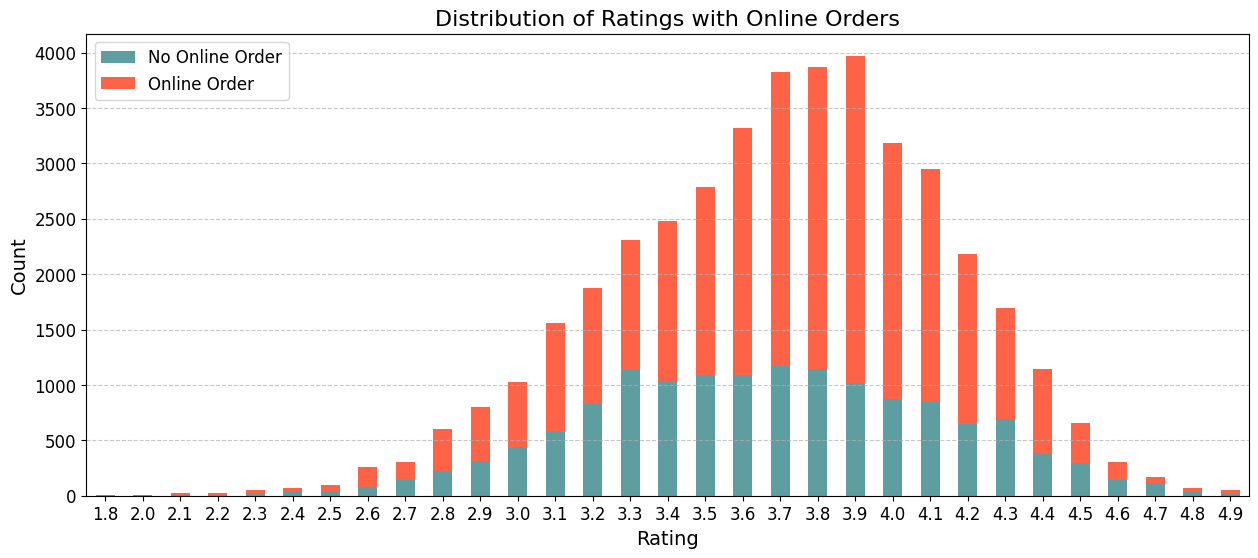

In [13]:
import matplotlib.pyplot as plt

# Plotting with style
colors = ['#5f9ea0', '#ff6347']  # Customize the colors
ax = x.plot(kind='bar', stacked=True, color=colors, figsize=(15, 6))

# Adding labels and title
plt.title('Distribution of Ratings with Online Orders', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Customize legend
plt.legend(['No Online Order', 'Online Order'], loc='upper left', fontsize=12)

# Beautify the x-axis and y-axis labels
plt.xticks(rotation=0, ha='center', fontsize=12)
plt.yticks(fontsize=12)

# Adding grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

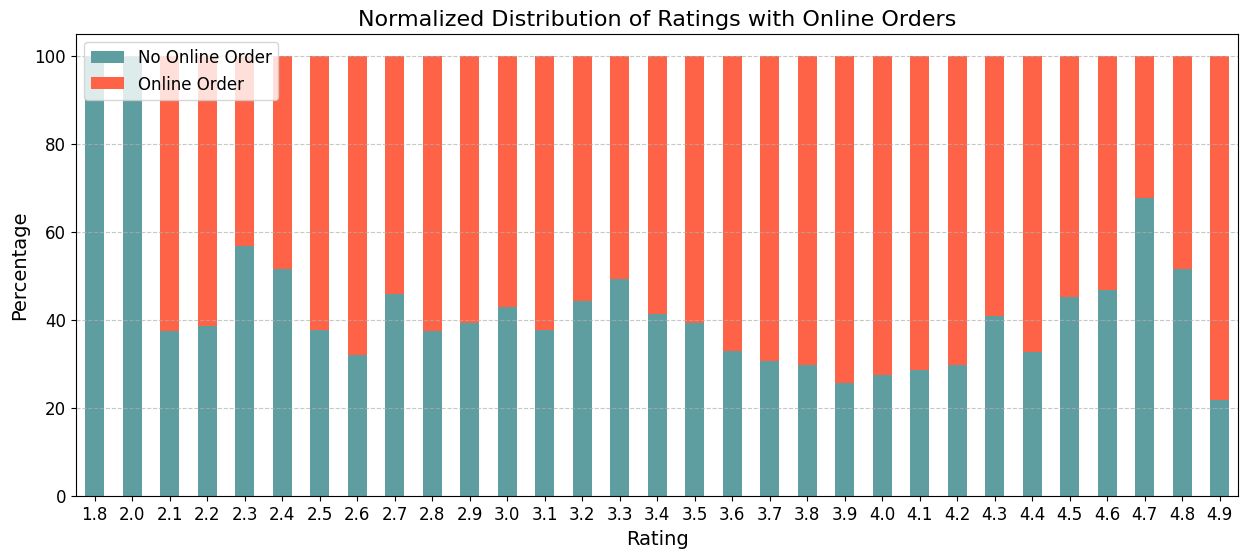

In [14]:
normalize_zomato = x.div(x.sum(axis=1).astype(float),axis=0)

# Plotting with style
colors = ['#5f9ea0', '#ff6347']  # Customize the colors
ax = (normalize_zomato*100).plot(kind='bar', stacked=True, color=colors, figsize=(15, 6))

# Adding labels and title
plt.title('Normalized Distribution of Ratings with Online Orders', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Percentage', fontsize=14)

# Customize legend
plt.legend(['No Online Order', 'Online Order'], loc='upper left', fontsize=12)

# Beautify the x-axis and y-axis labels
plt.xticks(rotation=0, ha='center', fontsize=12)
plt.yticks(fontsize=12)

# Adding grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

### Text Analyze

#### Text Cleaning

In [15]:
zomato['rest_type'].isnull().sum()

227

In [16]:
zomato2 = zomato.dropna(subset=['rest_type'])

In [17]:
zomato2.shape

(51490, 17)

In [18]:
zomato2['rest_type'].isnull().sum()

0

In [19]:
zomato2['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [20]:
# Create a new DataFrame 'quick_bites' containing rows where the 'rest_type' column contains the string 'Quick Bites'
quick_bites = zomato2[zomato2['rest_type'].str.contains('Quick Bites')]

In [21]:
quick_bites.shape

(20639, 17)

In [22]:
quick_bites.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [23]:
quick_bites['reviews_list']

3        [('Rated 4.0', "RATED\n  Great food and proper...
23       [('Rated 4.0', "RATED\n  So, went here with fr...
26       [('Rated 5.0', 'RATED\n  please provide some e...
31       [('Rated 1.0', "RATED\n  Worst restaurant ever...
34       [('Rated 3.0', 'RATED\n  Not worth for the mon...
                               ...                        
51641    [('Rated 2.0', "RATED\n  Food is not upto the ...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [('Rated 5.0', "RATED\n  I was randomly lookin...
Name: reviews_list, Length: 20639, dtype: object

In [24]:
# Convert all reviews in the 'reviews_list' column to lowercase
quick_bites['reviews_list'] = quick_bites['reviews_list'].apply(lambda x: x.lower())

In [25]:
from nltk.corpus import RegexpTokenizer

tokenizer = RegexpTokenizer("[a-zA-Z]+")

In [26]:
sample = zomato2[0:10000]

In [27]:
reviews_token = sample['reviews_list'].apply(tokenizer.tokenize)
reviews_token

0        [Rated, RATED, n, A, beautiful, place, to, din...
1        [Rated, RATED, n, Had, been, here, for, dinner...
2        [Rated, RATED, n, Ambience, is, not, that, goo...
3        [Rated, RATED, n, Great, food, and, proper, Ka...
4        [Rated, RATED, n, Very, good, restaurant, in, ...
                               ...                        
10046    [Rated, RATED, n, A, simplistic, joy, for, loc...
10047                              [Rated, RATED, n, Good]
10048    [Rated, RATED, n, Vry, gud, taste, and, someth...
10049                                                   []
10050                                                   []
Name: reviews_list, Length: 10000, dtype: object

#### Conducting Unigram Analysis and Removal of Stopwords

In [28]:
from nltk.corpus import stopwords

stop = stopwords.words('english')

In [29]:
# Extend the list 'stop' with specified elements
stop.extend(['rated', 'n', 'nan', 'x', 'RATED', 'Rated'])

In [30]:
# Apply a lambda function to create a new list 'reviews_token_clean' by filtering out tokens present in the 'stop' list
reviews_token_clean = reviews_token.apply(lambda each_review: [token for token in each_review if token not in stop])
reviews_token_clean

0        [A, beautiful, place, dine, The, interiors, ta...
1        [Had, dinner, family, Turned, good, choose, su...
2        [Ambience, good, enough, pocket, friendly, caf...
3        [Great, food, proper, Karnataka, style, full, ...
4        [Very, good, restaurant, neighbourhood, Buffet...
                               ...                        
10046    [A, simplistic, joy, local, biryani, lovers, n...
10047                                               [Good]
10048    [Vry, gud, taste, something, different, must, ...
10049                                                   []
10050                                                   []
Name: reviews_list, Length: 10000, dtype: object

In [31]:
total_reviews_2D = list(reviews_token_clean)

In [32]:
total_reviews_1D = []

for review in total_reviews_2D:
    for word in review:
        total_reviews_1D.append(word)

In [33]:
from nltk import FreqDist

fd = FreqDist()

In [34]:
for word in total_reviews_1D:
    fd[word] = fd[word] + 1

In [35]:
fd.most_common(20)

[('place', 139173),
 ('I', 137965),
 ('good', 134232),
 ('food', 126195),
 ('The', 97479),
 ('chicken', 46887),
 ('service', 41216),
 ('taste', 40063),
 ('ordered', 39651),
 ('great', 34402),
 ('really', 33942),
 ('time', 33052),
 ('try', 32415),
 ('one', 32079),
 ('ambience', 31703),
 ('like', 30679),
 ('also', 30647),
 ('It', 30487),
 ('visit', 27355),
 ('restaurant', 26421)]

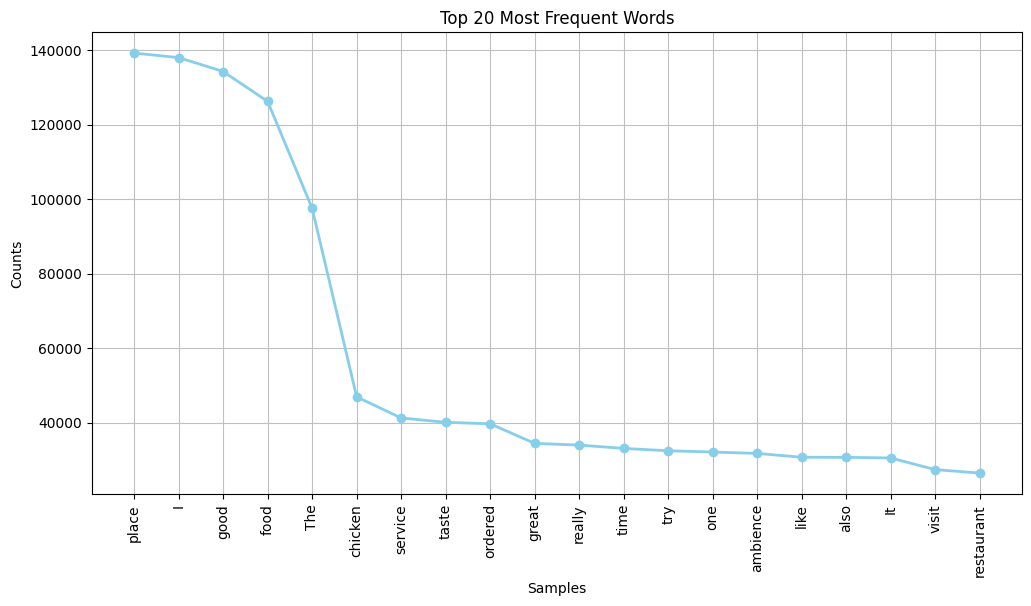

In [36]:
plt.figure(figsize=(12, 6))
fd.plot(20, cumulative=False, color='skyblue', title='Top 20 Most Frequent Words', linewidth=2, marker='o')

#### Conducting Bi-grams and Trigrams Analysis

In [37]:
from nltk import bigrams, trigrams

bigrams = bigrams(total_reviews_1D)

In [38]:
fd_bigrams = FreqDist()

for bigram in bigrams:
    fd_bigrams[bigram] = fd_bigrams[bigram] + 1

In [39]:
fd_bigrams.most_common(20)

[(('The', 'food'), 10497),
 (('I', 'ordered'), 10159),
 (('really', 'good'), 9575),
 (('This', 'place'), 8208),
 (('must', 'try'), 7824),
 (('I', 'would'), 7353),
 (('We', 'ordered'), 7223),
 (('visit', 'place'), 6897),
 (('food', 'good'), 6823),
 (('good', 'food'), 6482),
 (('The', 'place'), 6158),
 (('main', 'course'), 5544),
 (('non', 'veg'), 5364),
 (('good', 'place'), 5339),
 (('ice', 'cream'), 5287),
 (('also', 'good'), 5083),
 (('The', 'ambience'), 4798),
 (('I', 'tried'), 4523),
 (('good', 'I'), 4139),
 (('good', 'The'), 4078)]

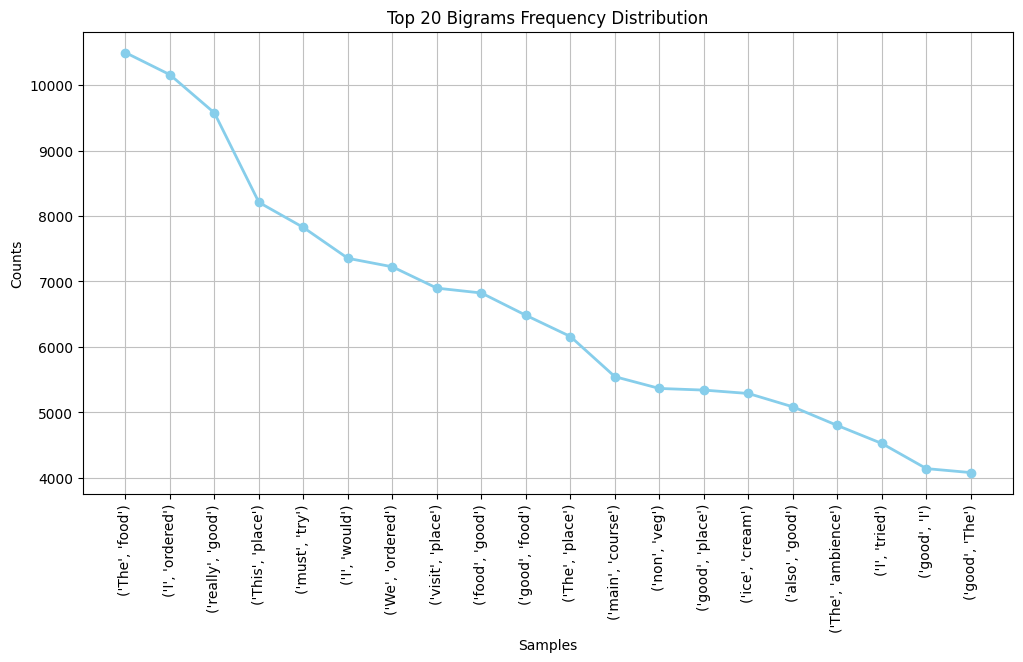

In [40]:
plt.figure(figsize=(12, 6))
fd_bigrams.plot(20, cumulative=False, color='skyblue', title='Top 20 Bigrams Frequency Distribution', linewidth=2, marker='o')

In [41]:
trigrams = trigrams(total_reviews_1D)

In [42]:
fd_trigrams = FreqDist()

for trigram in trigrams:
    fd_trigrams[trigram] = fd_trigrams[trigram] + 1

In [43]:
fd_trigrams.most_common(20)

[(('veg', 'non', 'veg'), 1525),
 (('must', 'visit', 'place'), 1487),
 (('The', 'food', 'good'), 1339),
 (('place', 'hangout', 'friends'), 1165),
 (('I', 'must', 'say'), 1131),
 (('I', 'would', 'recommend'), 1059),
 (('I', 'visited', 'place'), 1054),
 (('I', 'would', 'say'), 979),
 (('place', 'hang', 'friends'), 967),
 (('food', 'really', 'good'), 886),
 (('nFood', 'nAmbience', 'nService'), 845),
 (('A', 'must', 'visit'), 768),
 (('The', 'ambience', 'good'), 751),
 (('A', 'good', 'place'), 737),
 (('North', 'Indian', 'food'), 675),
 (('I', 'would', 'like'), 619),
 (('nFood', 'nService', 'nAmbience'), 607),
 (('A', 'must', 'try'), 603),
 (('I', 'really', 'liked'), 595),
 (('I', 'ordered', 'chicken'), 582)]

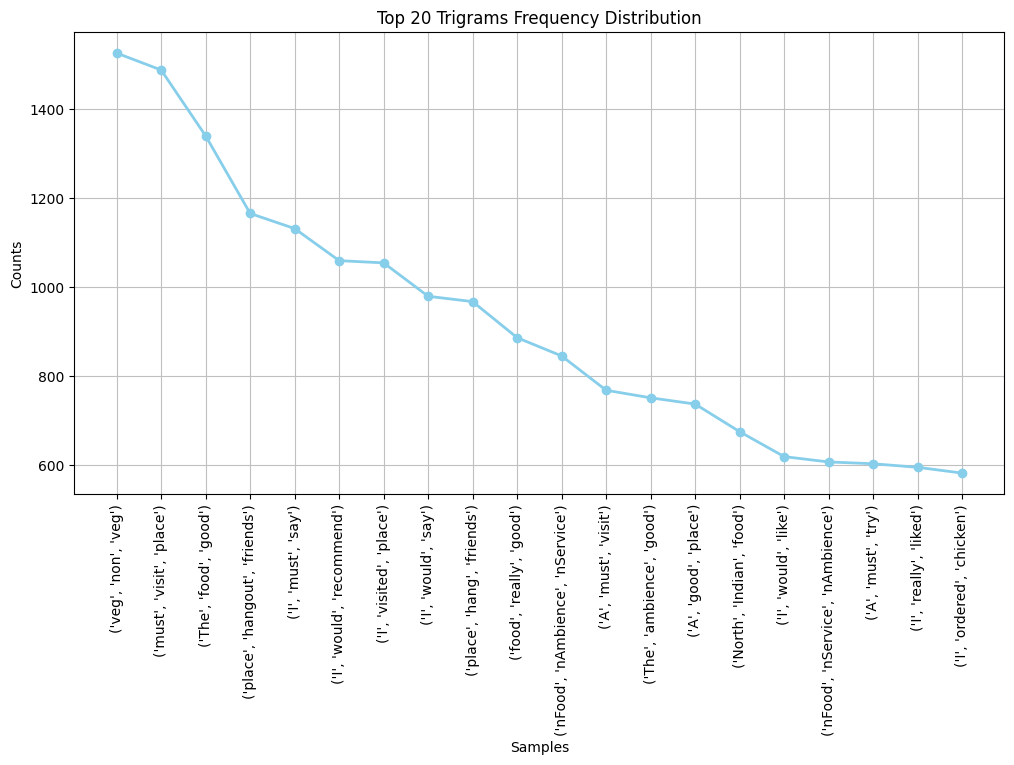

In [44]:
plt.figure(figsize=(12, 6))
fd_trigrams.plot(20, cumulative=False, color='skyblue', title='Top 20 Trigrams Frequency Distribution', linewidth=2, marker='o')

### Spatial Analysis

#### Extract Geographical Coordinates

In [45]:
zomato['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [46]:
len(zomato['location'].unique())

94

In [47]:
# Concatenate additional location information to the 'location' column in the DataFrame 'zomato'
zomato['location'] = zomato['location'] + ' ,Bangalore , Karnataka , India'
zomato['location']

0              Banashankari ,Bangalore , Karnataka , India
1              Banashankari ,Bangalore , Karnataka , India
2              Banashankari ,Bangalore , Karnataka , India
3              Banashankari ,Bangalore , Karnataka , India
4              Basavanagudi ,Bangalore , Karnataka , India
                               ...                        
51712            Whitefield ,Bangalore , Karnataka , India
51713            Whitefield ,Bangalore , Karnataka , India
51714            Whitefield ,Bangalore , Karnataka , India
51715    ITPL Main Road, Whitefield ,Bangalore , Karnat...
51716    ITPL Main Road, Whitefield ,Bangalore , Karnat...
Name: location, Length: 51717, dtype: object

In [48]:
zomato_copy = zomato.copy()

In [49]:
zomato_copy['location'].isnull().sum()

21

In [50]:
zomato_copy = zomato_copy.dropna(subset=['location'])

In [51]:
zomato_copy['location'].isnull().sum()

0

In [52]:
locations = pd.DataFrame(zomato_copy['location'].unique())

In [53]:
locations.columns = ['name']

In [54]:
locations

,name
0,"Banashankari ,Bangalore , Karnataka , India"
1,"Basavanagudi ,Bangalore , Karnataka , India"
2,"Mysore Road ,Bangalore , Karnataka , India"
3,"Jayanagar ,Bangalore , Karnataka , India"
4,"Kumaraswamy Layout ,Bangalore , Karnataka , India"
...,...
88,"West Bangalore ,Bangalore , Karnataka , India"
89,"Magadi Road ,Bangalore , Karnataka , India"
90,"Yelahanka ,Bangalore , Karnataka , India"
91,"Sahakara Nagar ,Bangalore , Karnataka , India"


In [55]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent='app', timeout=None)

In [56]:
lat = []
lon = []

for location in locations['name']:
    location = geolocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)

In [57]:
locations['latitude'] = lat
locations['longitude'] = lon

In [58]:
locations

,name,latitude,longitude
0,"Banashankari ,Bangalore , Karnataka , India",12.915221,77.573598
1,"Basavanagudi ,Bangalore , Karnataka , India",12.941726,77.575502
2,"Mysore Road ,Bangalore , Karnataka , India",12.946703,77.530070
3,"Jayanagar ,Bangalore , Karnataka , India",12.929273,77.582423
4,"Kumaraswamy Layout ,Bangalore , Karnataka , India",12.908149,77.555318
...,...,...,...
88,"West Bangalore ,Bangalore , Karnataka , India",13.022235,77.567183
89,"Magadi Road ,Bangalore , Karnataka , India",12.975653,77.555355
90,"Yelahanka ,Bangalore , Karnataka , India",13.100698,77.596345
91,"Sahakara Nagar ,Bangalore , Karnataka , India",13.062147,77.580061


#### Build Geographical Heat-Maps

In [59]:
locations.isnull().sum()

name         0
latitude     2
longitude    2
dtype: int64

In [60]:
locations[locations['latitude'].isna()]

,name,latitude,longitude
79,"Rammurthy Nagar ,Bangalore , Karnataka , India",NaN,NaN
85,"Sadashiv Nagar ,Bangalore , Karnataka , India",NaN,NaN


In [61]:
locations['latitude'][79] = 13.0120218
locations['longitude'][79] = 77.6777817

In [62]:
locations['latitude'][85] = 13.010316
locations['longitude'][85] = 77.580569

In [63]:
locations.isnull().sum()

name         0
latitude     0
longitude    0
dtype: int64

In [64]:
zomato['cuisines'].isnull().sum()

45

In [65]:
zomato = zomato.dropna(subset=['cuisines'])

In [66]:
north_india = zomato[zomato['cuisines'].str.contains('North Indian')]

In [67]:
north_india.shape

(21085, 17)

In [68]:
north_india_rest_count = north_india['location'].value_counts().reset_index().rename(columns={'location':'name'})
north_india_rest_count

,name,count
0,"BTM ,Bangalore , Karnataka , India",2469
1,"HSR ,Bangalore , Karnataka , India",1123
2,"Whitefield ,Bangalore , Karnataka , India",1059
3,"Marathahalli ,Bangalore , Karnataka , India",1038
4,"JP Nagar ,Bangalore , Karnataka , India",958
...,...,...
85,"Hebbal ,Bangalore , Karnataka , India",4
86,"Jakkur ,Bangalore , Karnataka , India",3
87,"Central Bangalore ,Bangalore , Karnataka , India",2
88,"West Bangalore ,Bangalore , Karnataka , India",1


In [69]:
heatmap_zomato = north_india_rest_count.merge(locations, on='name', how='left')

In [70]:
heatmap_zomato

,name,count,latitude,longitude
0,"BTM ,Bangalore , Karnataka , India",2469,12.911276,77.604565
1,"HSR ,Bangalore , Karnataka , India",1123,12.911623,77.638862
2,"Whitefield ,Bangalore , Karnataka , India",1059,12.969637,77.749745
3,"Marathahalli ,Bangalore , Karnataka , India",1038,12.955257,77.698416
4,"JP Nagar ,Bangalore , Karnataka , India",958,12.912076,77.579393
...,...,...,...,...
85,"Hebbal ,Bangalore , Karnataka , India",4,13.038218,77.591900
86,"Jakkur ,Bangalore , Karnataka , India",3,13.078474,77.606894
87,"Central Bangalore ,Bangalore , Karnataka , India",2,12.973393,77.611234
88,"West Bangalore ,Bangalore , Karnataka , India",1,13.022235,77.567183


In [71]:
import folium

basemap = folium.Map()

In [72]:
heatmap_zomato.columns

Index(['name', 'count', 'latitude', 'longitude'], dtype='object')

In [73]:
from folium.plugins import HeatMap

HeatMap(heatmap_zomato[['latitude', 'longitude', 'count']]).add_to(basemap)
basemap

### Automate Our Analysis

In [74]:
def get_heatmap(cuisine):
    cuisine_zomato = zomato[zomato['cuisines'].str.contains(cuisine)]
    
    cuisine_rest_count = cuisine_zomato['location'].value_counts().reset_index().rename(columns={'location':'name'})
    heatmap_zomato = cuisine_rest_count.merge(locations, on='name', how='left')
    print(heatmap_zomato.head(4))
    
    basemap = folium.Map()
    HeatMap(heatmap_zomato[['latitude', 'longitude', 'count']]).add_to(basemap)
    return basemap

In [75]:
zomato['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [76]:
get_heatmap('Italian')

                                                name  count   latitude  \
0  Koramangala 5th Block ,Bangalore , Karnataka ,...    220  12.934843   
1         Indiranagar ,Bangalore , Karnataka , India    209  12.973291   
2  Koramangala 4th Block ,Bangalore , Karnataka ,...    187  12.932778   
3            JP Nagar ,Bangalore , Karnataka , India    185  12.912076   

   longitude  
0  77.618977  
1  77.640467  
2  77.629405  
3  77.579393  
